<p style="text-align:left"><span style="font-size:30px">电信客户流失分析与预测</span></p>

<p><span style="font-size:20px">一、项目背景</span></p>

随着市场饱和度的上升，电信运营商的竞争也越来越激烈，再加上高昂的客户获取成本，流失分析就变得非常关键。流失率是一种指标，用于描述取消或未续订公司套餐的客户数量。对于客户流失率而言，每增加5%，利润就可能随之降低25%-85%。因此，如何减少电信客户流失的分析与预测至关重要。基于从客户流失分析中获得的信息，电信公司可以制定战略、瞄准细分市场，提高所提供服务的质量以改善客户体验，从而培养客户的信任度。

<p><span style="font-size:20px">二、项目目标</span></p>

<p>本文将基于IBM的电信客户数据集（数据来源：<a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Kaggle - Telco Customer Churn</a>），进行探索性数据分析以洞察客户特征与流失的关系，构建特征工程并运用分类机器学习算法建立模型，尝试找到合适的模型预测流失客户，从而为运营商的客户服务部门提供决策依据。</p>




<p><span style="font-size:20px">三、理解数据</span></p>

数据共计7043行，21列（字段）。每行代表一个客户，每列包含一个唯一客户属性，其中，第一列是客户ID，最后一列“Churn“表示用户是否流失。各字段的具体含义如下：

<table border="1" cellpadding="1" cellspacing="1" style="width:500px">
	<tbody>
		<tr>
			<td style="text-align:center; width:36px">序号</td>
			<td style="text-align:center; width:89px">字段名</td>
			<td style="text-align:center">数据类型</td>
			<td style="text-align:center">字段描述</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">1</td>
			<td style="text-align:center; width:89px">customerID</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户ID</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">2</td>
			<td style="text-align:center; width:89px">gender</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">性别（男，女）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">3</td>
			<td style="text-align:center; width:89px">SeniorCitizen</td>
			<td style="text-align:center">Integer</td>
			<td style="text-align:center">客户是否为老年人（是为1，不是为0）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">4</td>
			<td style="text-align:center; width:89px">Partner</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否有伴侣（是，否）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">5</td>
			<td style="text-align:center; width:89px">Dependents</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否有家属（是，否）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">6</td>
			<td style="text-align:center; width:89px">tenure</td>
			<td style="text-align:center">Integer</td>
			<td style="text-align:center">客户已使用月数</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">7</td>
			<td style="text-align:center; width:89px">PhoneService</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否使用电话服务（是，否）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">8</td>
			<td style="text-align:center; width:89px">MultipleLines</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否有多条线路（是，否，没有电话服务）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">9</td>
			<td style="text-align:center; width:89px">InternetService</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户的互联网服务提供商（DSL，光纤，否）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">10</td>
			<td style="text-align:center; width:89px">OnlineSecurity</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否具有在线安全性（是，否，没有互联网服务）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">11</td>
			<td style="text-align:center; width:89px">OnlineBackup</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否具有在线备份（是，否，没有互联网服务）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">12</td>
			<td style="text-align:center; width:89px">DeviceProtection</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否具有设备保护（是，否，没有互联网服务）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">13</td>
			<td style="text-align:center; width:89px">TechSupport</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否具有技术支持（是，否，没有互联网服务）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">14</td>
			<td style="text-align:center; width:89px">StreamingTV</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否具有流媒体电视（是，否，没有互联网服务）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">15</td>
			<td style="text-align:center; width:89px">StreamingMovies</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否具有流媒体电影（是，否，没有互联网服务）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">16</td>
			<td style="text-align:center; width:89px">Contract</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户的合同期限（每月，一年，两年）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">17</td>
			<td style="text-align:center; width:89px">PaperlessBilling</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否具有无纸化账单（是，否）</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">18</td>
			<td style="text-align:center; width:89px">PaymentMethod</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户的付款方式（电子支票，邮寄支票，银行转账（自动），信用卡（自动））</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">19</td>
			<td style="text-align:center; width:89px">MonthlyCharges</td>
			<td style="text-align:center">Integer</td>
			<td style="text-align:center">每月向客户收取的金额</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">20</td>
			<td style="text-align:center; width:89px">TotalCharges</td>
			<td style="text-align:center">Integer</td>
			<td style="text-align:center">向客户收取的总金额</td>
		</tr>
		<tr>
			<td style="text-align:center; width:36px">21</td>
			<td style="text-align:center; width:89px">Churn</td>
			<td style="text-align:center">String</td>
			<td style="text-align:center">客户是否流失（是，否）</td>
		</tr>
	</tbody>
</table>

<p style="text-align:center">&nbsp;</p>




<p><span style="font-size:20px">四、数据清洗</span></p>

在这一部分，通过对数据的概览，删除空白值，缺失值补全和字段类型转换等手段对原始数据进行清理，以便后续的分析。

In [2]:
#导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format='{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
#数据概览
data=pd.read_csv('telco.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot: >

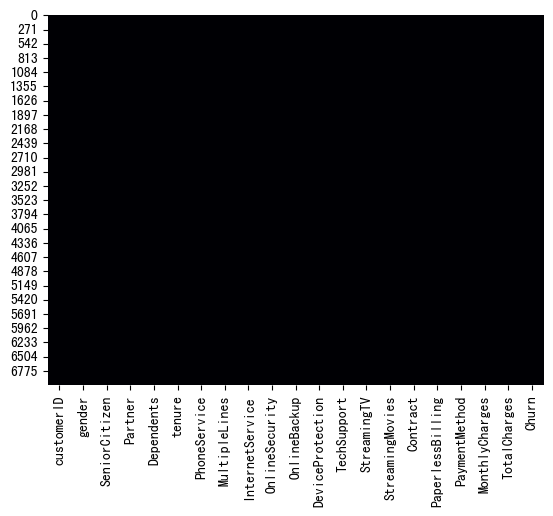

In [7]:
#检查缺失值
sns.heatmap(data.isnull(),cmap='magma',cbar=False)

经检查，该数据集没有缺失值

In [8]:
#数值数据分布情况
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


通过数据分布可以发现，该数据集大多数字段都是分类数据，数值数据只有三个：SeniorCitizen，tenure，MonthlyCharges。其中，和MonthlyCharges对应的TotalCharges应为数据类型，却被以文本格式存储，因此接下来对数据进行格式转换。

In [9]:
#将分类数据转换为数值数据，首先发现totalcharges中存在空白字符型数据（所以heatmap无法显示），因此首先找出空白数据
l1=[len(i.split()) for i in data['TotalCharges']]
l2=[i for i in range(len(l1)) if l1[i] !=1]
print('含有空格的数据索引：',*l2)

#用前值补全空白数据
for i in l2:
    data.loc[i,'TotalCharges'] = data.loc[(i-1),'TotalCharges']
    
#再重新进行数据格式转换
data['TotalCharges'] = data['TotalCharges'].astype(float)

#将customerID列删除
data.drop(columns = ['customerID'], inplace = True)


含有空格的数据索引： 488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [10]:
#对分类数据进行编码，转换为数值数据
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df1=data.copy(deep=True)
text_data_features=[i for i in list(data.columns) if i not in list(data.describe().columns)]

print('编码数据一览')
for i in text_data_features:
    df1[i]=le.fit_transform(df1[i])
    print(i,': ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))


编码数据一览
gender :  [0 1]  =  ['Female' 'Male']
Partner :  [1 0]  =  ['Yes' 'No']
Dependents :  [0 1]  =  ['No' 'Yes']
PhoneService :  [0 1]  =  ['No' 'Yes']
MultipleLines :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  [1 0]  =  ['Yes' 'No']
PaymentMethod :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  [0 1]  =  ['No' 'Yes']


In [11]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2285.17,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2267.54,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.68,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1398.25,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3803.05,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


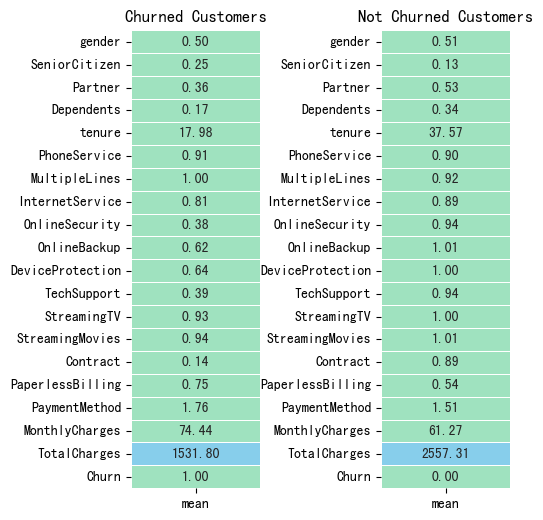

In [17]:
colors=['#9FE2BF','#87CEEB']

churn=df1[df1['Churn']==1].describe().T
not_churn=df1[df1['Churn']==0].describe().T

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(5,5))



plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors, linewidths=0.4, cbar=False, fmt='.2f')
plt.title("Churned Customers")

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, linewidths=0.4,  cbar=False, fmt='.2f')
plt.title("Not Churned Customers")

fig.tight_layout(pad=0)

由图可见，流失客户的tenure（平均使用周期）为17.98个月，未流失客户的平均使用周期为37.57个月。未流失客户的OnlineSecurity（在线安全性）、OnlineBackup（在线备份）、DeviceProtection（设备保护）和TechSupport（技术支持）的平均值均高于流失客户。流失客户的Contract（合同期限）远小于未流失客户。流失客户的Monthly Charges（每月付费）平均值为74.44，高于非流失客户的平均值61.27。而未流失客户的TotalCharges（总付费）平均值为2557.31，是高于流失客户的平均值1531.80的。

由流失客户和未流失客户的各项特征的平均值差异可以看出，某些特征二者体现出明显的差异，这可以帮助客户服务部门更多的关注流失客户以帮助他们保留服务。由于数据集的分类特征较多，所以特征平均值多数集中于0附近。

接下来将通过探索性数据分析，更多的洞察不同特征的含义。

<p><span style="font-size:20px">五、探索性数据分析</span></p>

In [19]:
#首先，将特征划分为数值型和分类型
col=list(df1.columns)
categorical_features=[]
numerical_features=[]
for i in col:
    if len(data[i].unique())>6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('分类特征: ', *categorical_features)
print('数值特征: ', *numerical_features)

分类特征:  gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
数值特征:  tenure MonthlyCharges TotalCharges


[73.4630129206304, 26.536987079369588]


Text(0.5, 1.0, 'Number of Churned/Not Churned Customers')

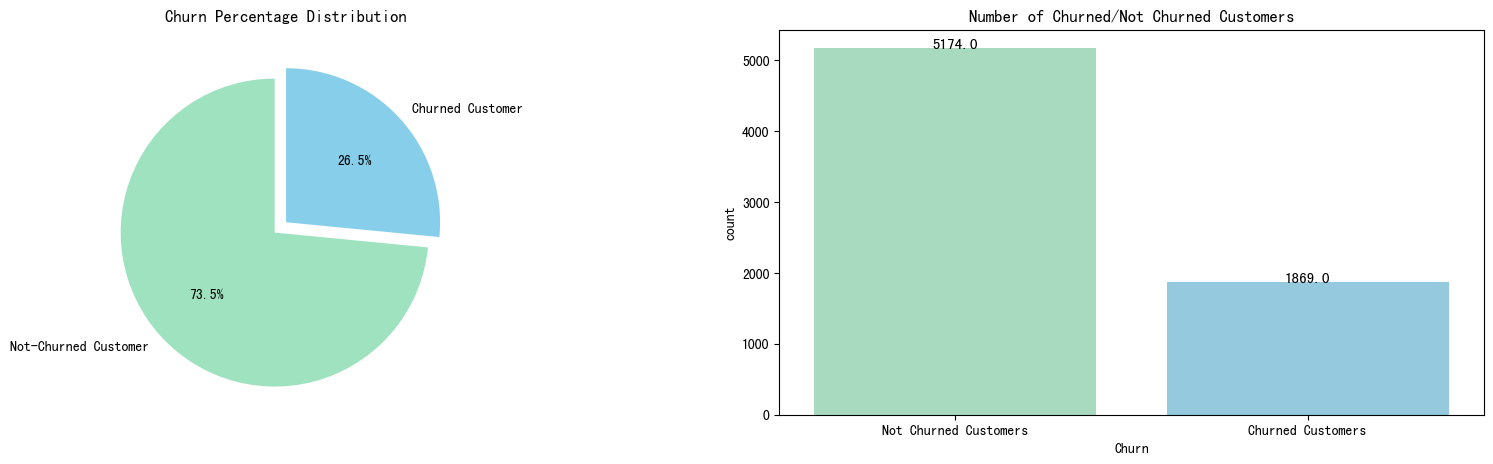

In [36]:
#目标值可视化（是否流失）
l=list(df1['Churn'].value_counts())
circle=[l[0]/sum(l)*100, l[1]/sum(l)*100]
print(circle)

fig=plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(circle, labels=['Not-Churned Customer', 'Churned Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1,0),colors=colors)
plt.title('Churn Percentage Distribution')

plt.subplot(1,2,2)
ax=sns.countplot(x='Churn', data=data, palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+2, rect.get_height(), horizontalalignment='center',fontsize=11)
ax.set_xticklabels(['Not Churned Customers','Churned Customers'])

plt.title('Number of Churned/Not Churned Customers')


由图可见，数据集中流失客户和非流失客户的比例是不均衡的，占比接近1:3。对于这种不均衡数据集，预测会偏向非流失客户，同时，可视化也会受到偏见的影响。

<p><span style="font-size:18px">（一）分类特征</span></p>

接下来，将所有分类特征划分为用户维度、服务维度、合同维度，并分别从三个维度进行探索：

用户维度：gender, SeniorCitize, Partner, Dependents

服务维度：PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

合同维度：Contract, PaperlessBilling, PaymentMethod

<p><span style="font-size:16px">1. 用户维度分析</span></p>

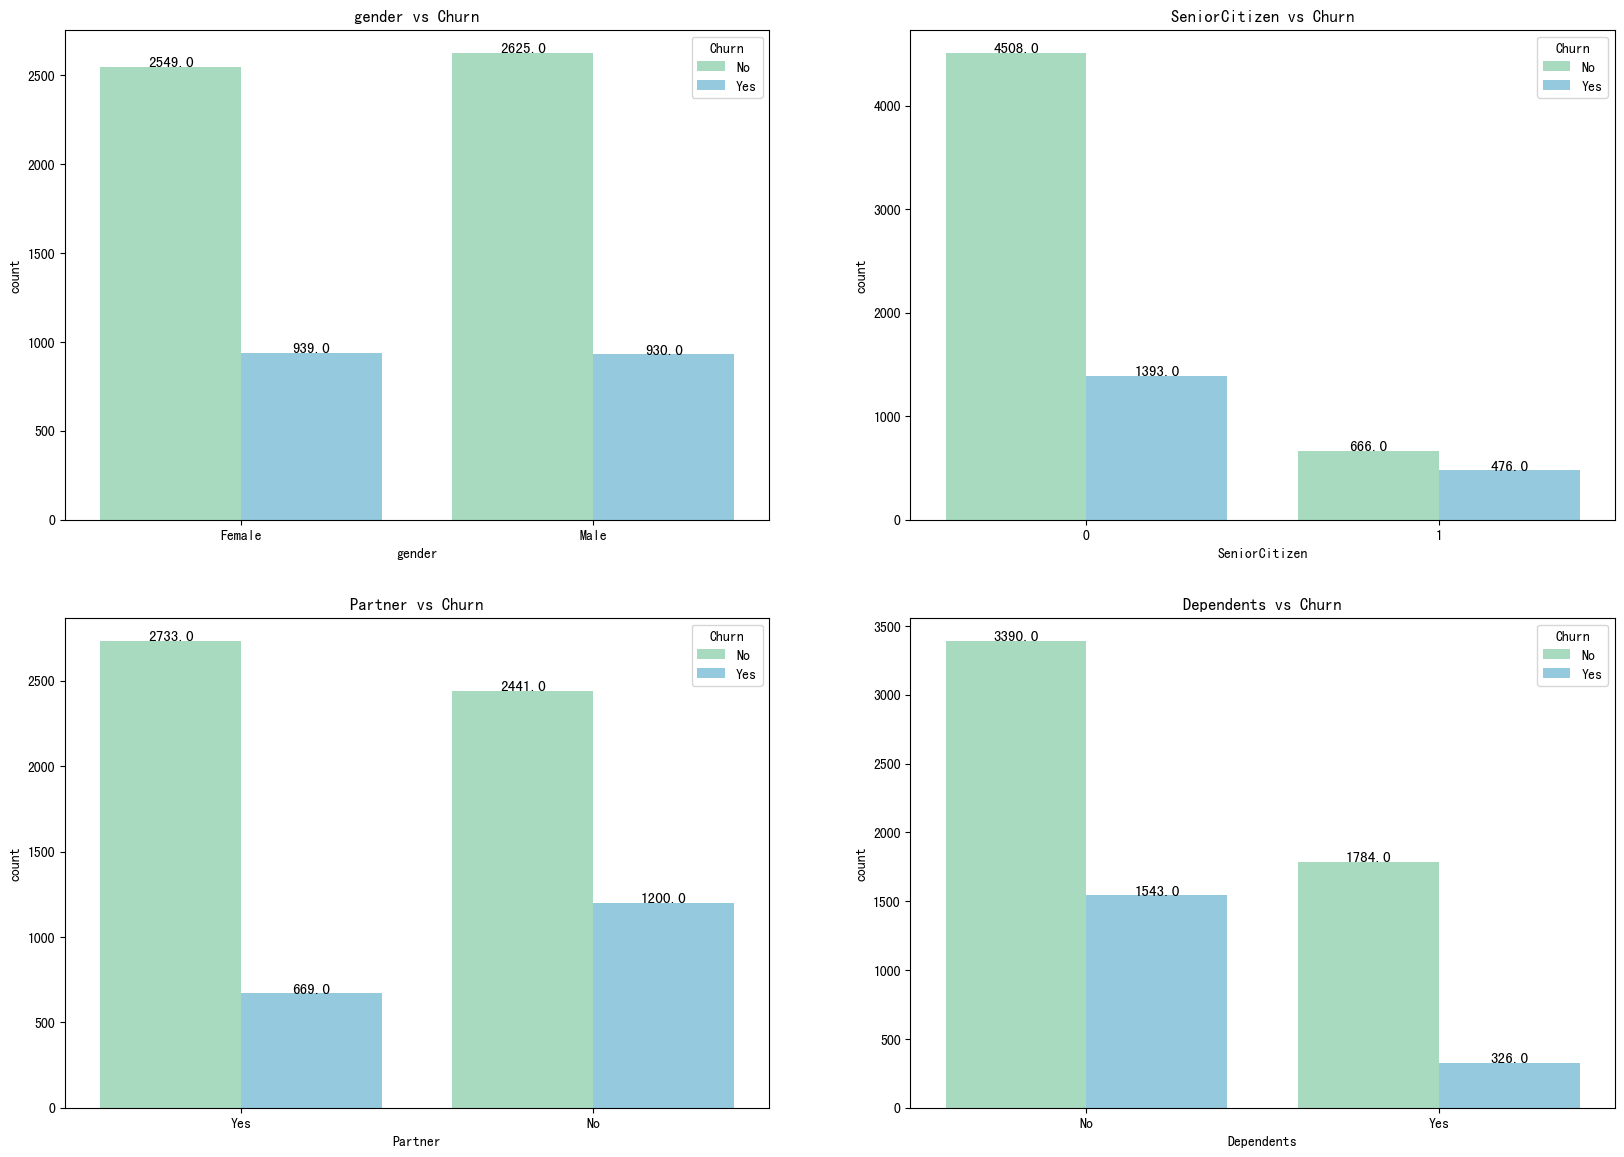

In [99]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=categorical_features[i],data = data,hue = "Churn",palette = colors)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs Churn'
    plt.title(title);

<p>小结：</p>

<ul>
	<li>流失与性别无关</li>
	<li>老年客户占比较小，但流失率更高</li>
	<li>拥有伴侣或家属的客户，流失率更低</li>
</ul>

<p><span style="font-size:16px">2. 服务维度分析</span></p>

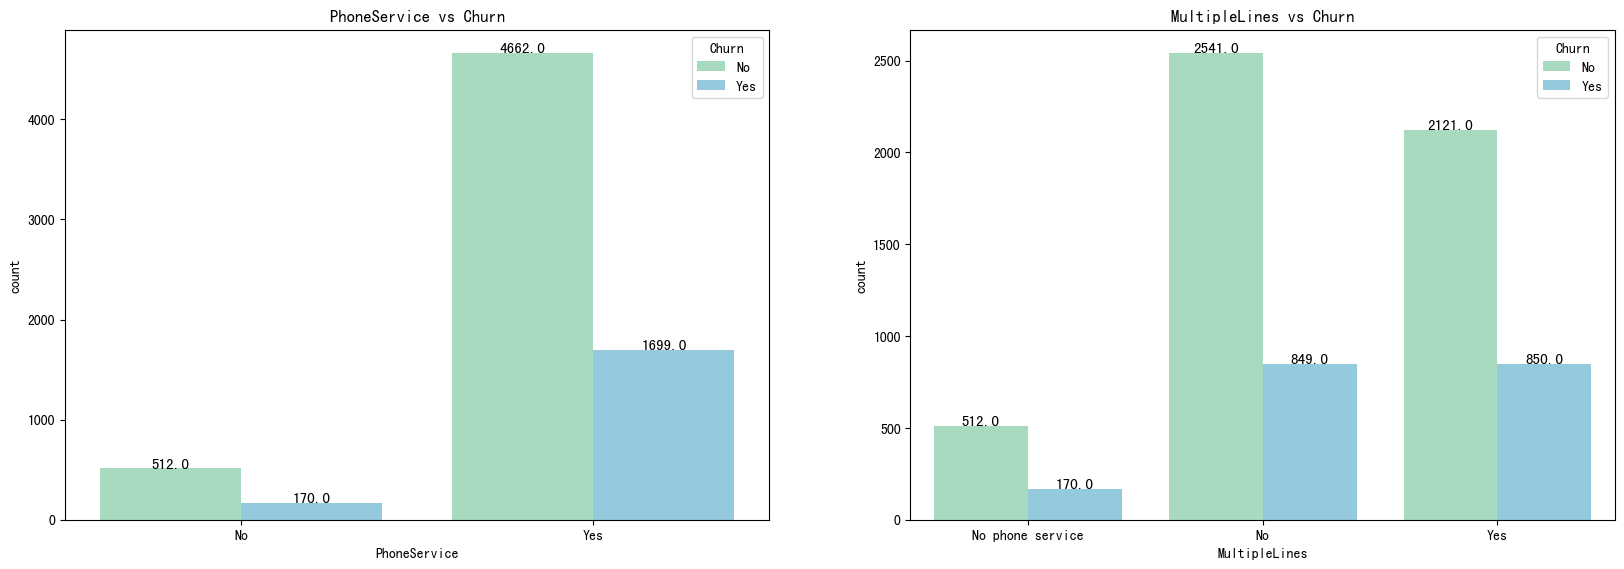

In [101]:
#电话服务
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,14))
for i in range(2):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=categorical_features[i+4],data = data,hue = "Churn",palette = colors)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i+4] + ' vs Churn'
    plt.title(title);

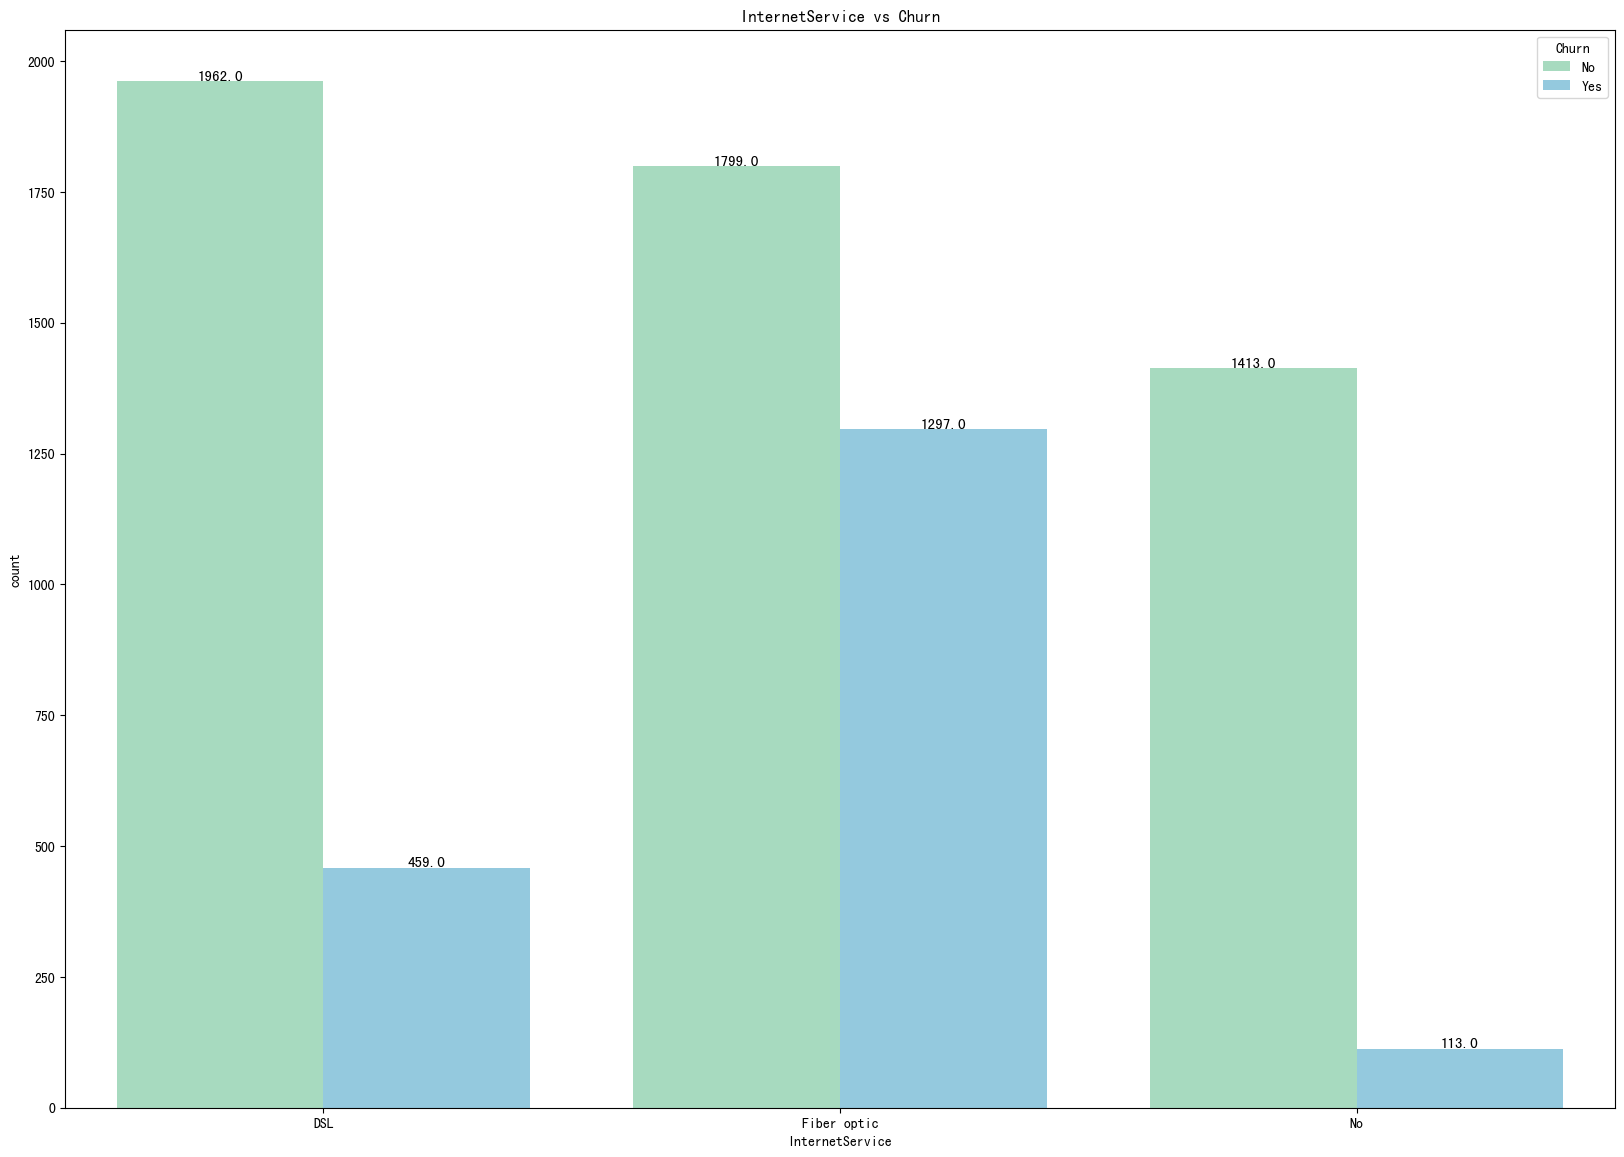

In [103]:
#网络服务
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (20,14))
for i in range(1):
    plt.subplot(1,1,i+1)
    ax = sns.countplot(x=categorical_features[i+6],data = data,hue = "Churn",palette = colors)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i+6] + ' vs Churn'
    plt.title(title);

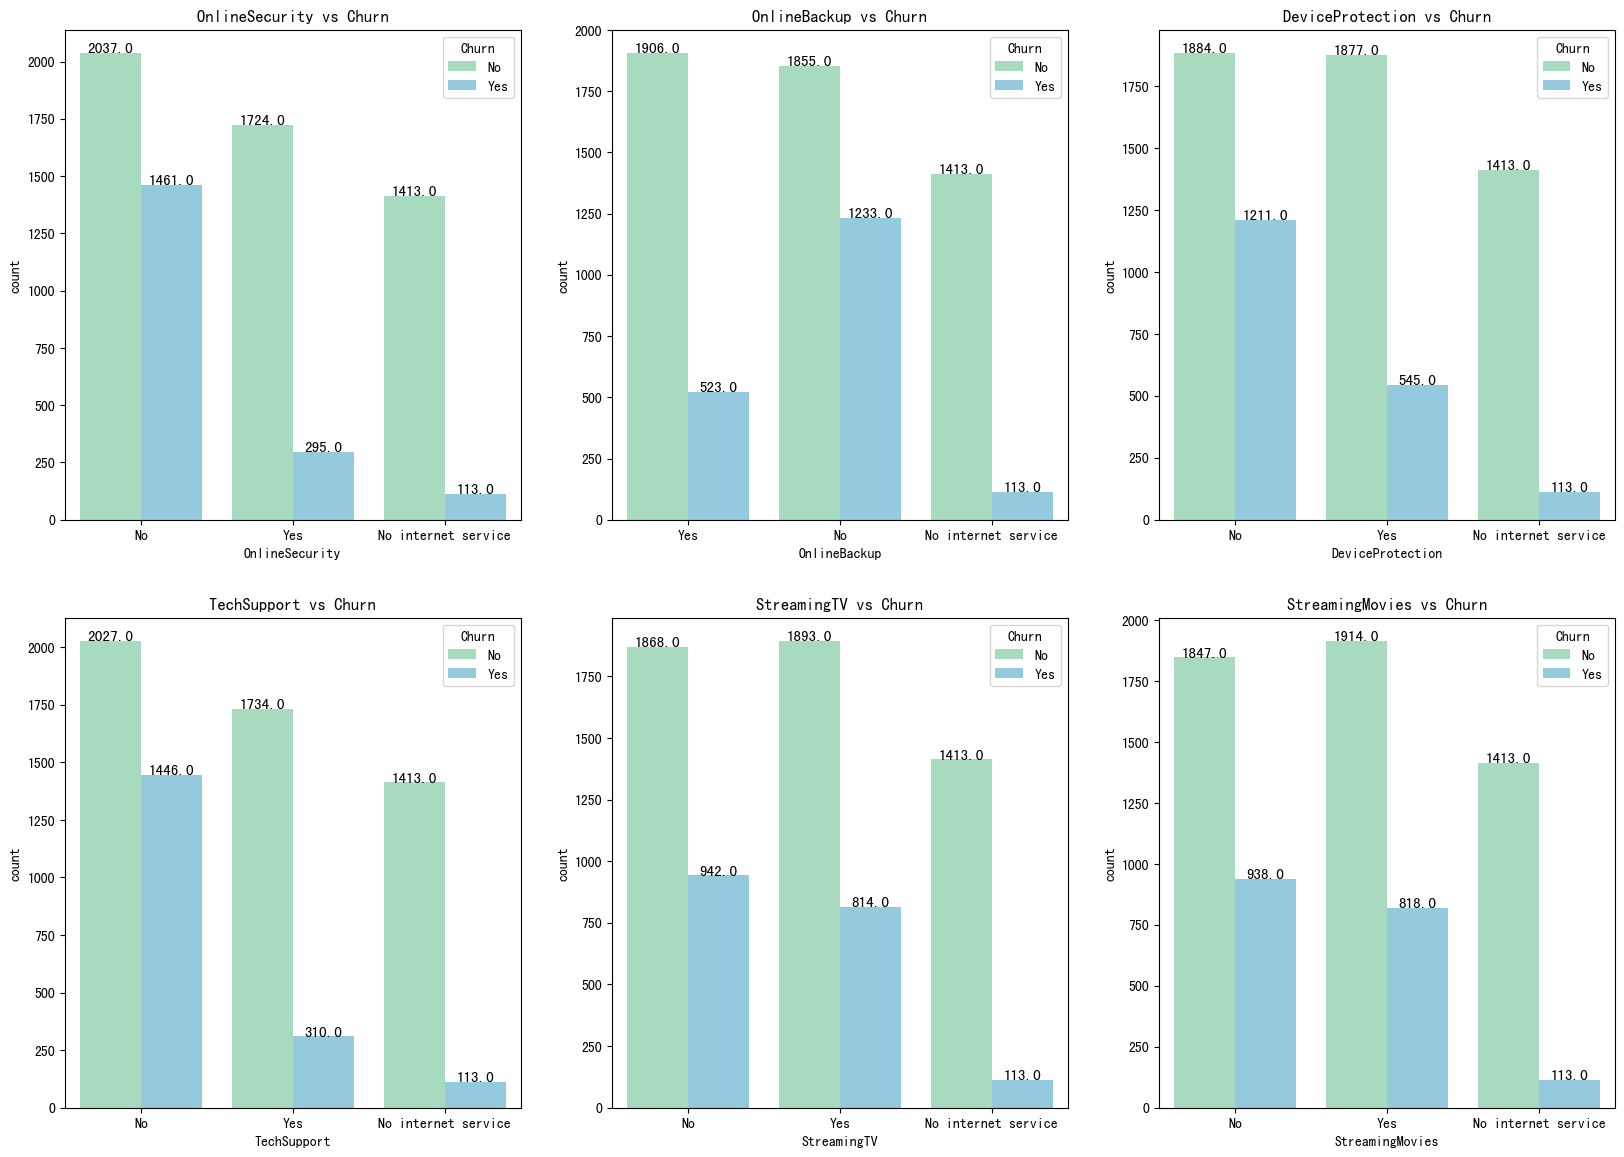

In [105]:
#网络服务子服务
fig = plt.subplots(nrows = 2,ncols = 3,figsize = (20,14))
for i in range(6):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=categorical_features[i+7],data = data,hue = "Churn",palette = colors)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i+7] + ' vs Churn'
    plt.title(title);

<p>小结：</p>

<ul>
	<li>大多数客户开通了电话服务，但是开通和未开通的流失比例相当；开通电话服务的人群中，接近半数的人群开通了多条线路，开通和未开通的流失比例也相差不大，可见电话服务（无论是单线还是多线）对客户整体流失影响较小</li>
	<li>大多数客户选择开通网络服务，其中选择光纤的人数比选择DSL的人数更多，然而，光纤客户的流失占比却更高；通过查看网络服务子服务流失情况可以发现，如果开通了安全、备份、保护、技术支持这些绑定服务流失率会降低；但流媒体电视和流媒体电影这两项子服务似乎没有前者留存效果好</li>
</ul>

<p><span style="font-size:16px">3. 合同维度分析</span></p>

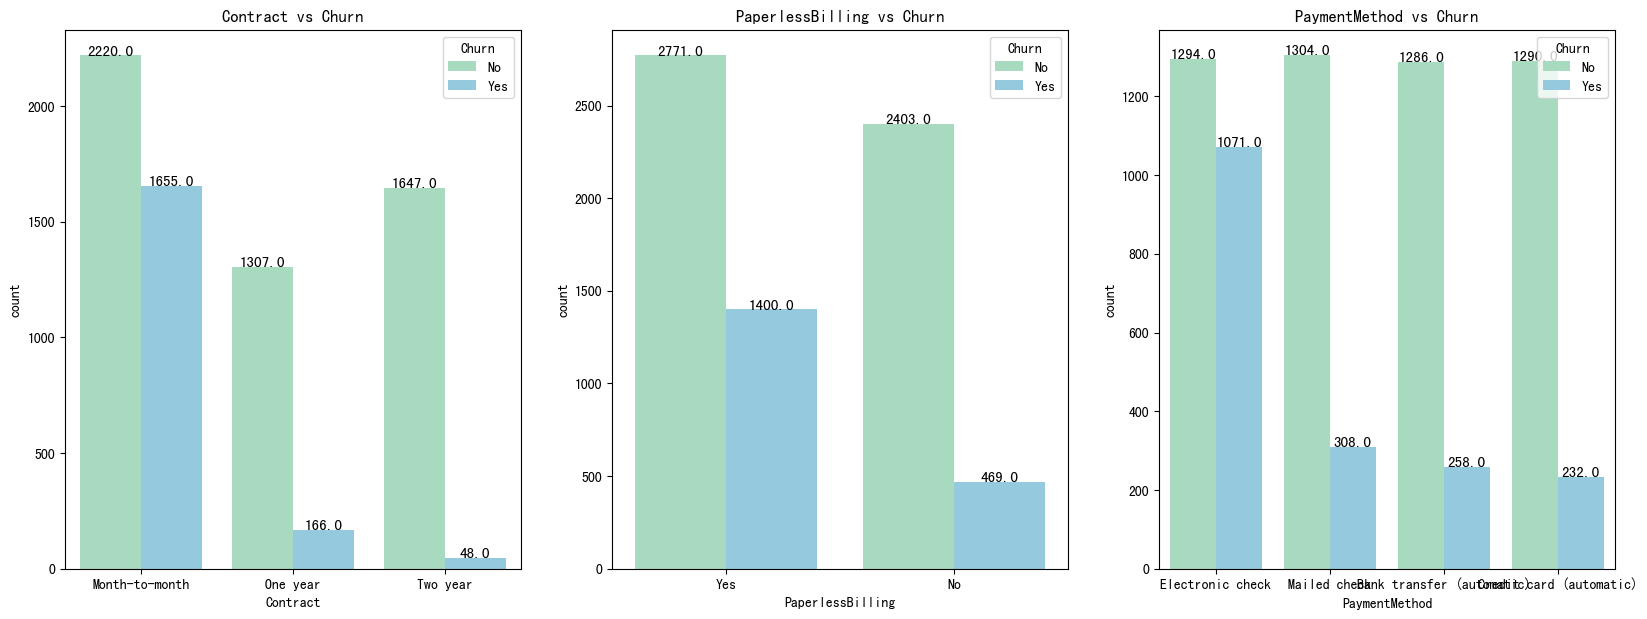

In [109]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=categorical_features[i+13],data = data,hue = "Churn",palette = colors)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i+13] + ' vs Churn'
    plt.title(title);

<p>小结：</p>

<ul>
	<li>开通按月服务的客户占绝大多数，可见大部分客户抱有一种试用的心理，相应的，按月服务的流失率也最高，客户可能在试用期结束后转向了其他服务商</li>
	<li>很多客户开通了无纸化账单服务，但是流失率也随之提升</li>
	<li>支付方式中，使用电子支票的客户数目最多，流失率也最高，推测该方式使用体验一半</li>
</ul>

<p><span style="font-size:18px">（二）数值特征</span></p>

接下来将探索三个数值特征：tenure, MonthlyCharges, TotalCharges各自的分布和相互之间的关系

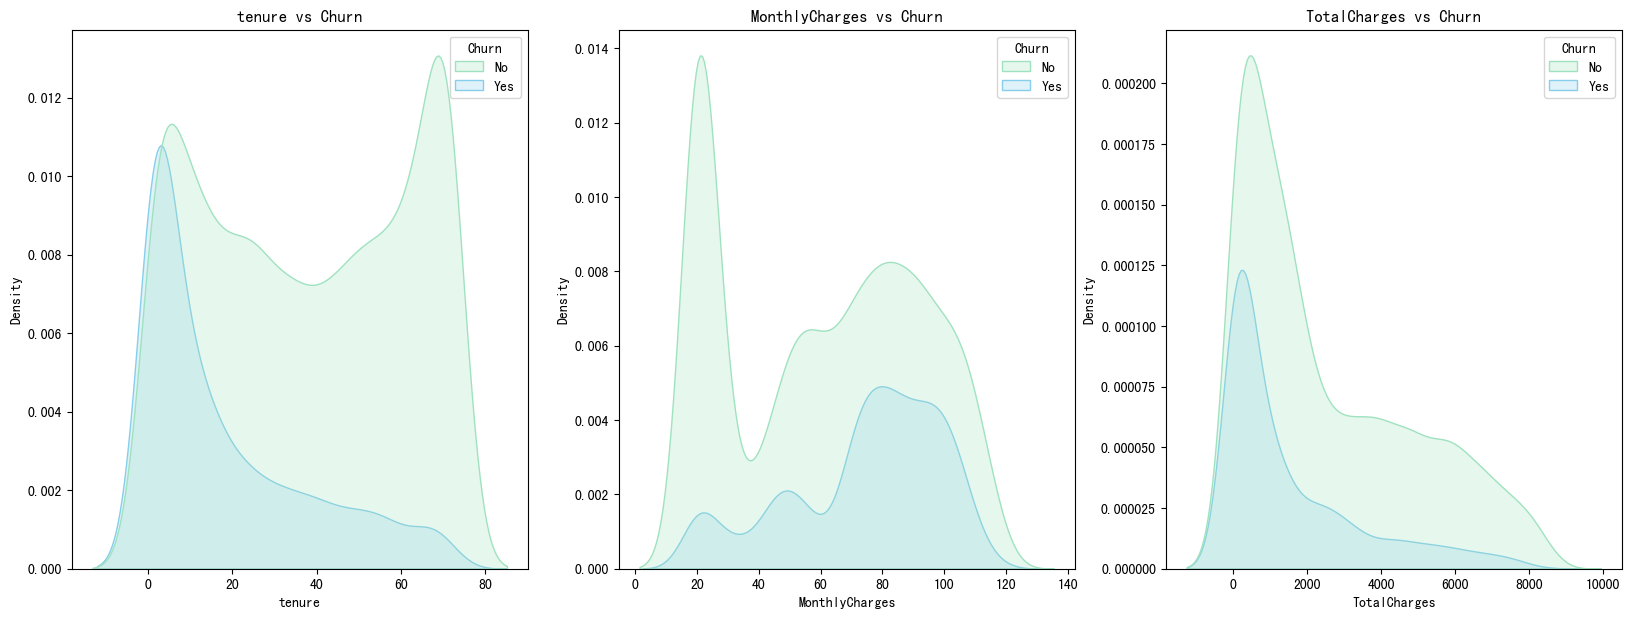

In [113]:
#通过概率密度分布查看三个数值特征的分布
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    ax = sns.kdeplot(x=numerical_features[i],data = data,hue = "Churn",palette = colors, shade='True')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = numerical_features[i] + ' vs Churn'
    plt.title(title);

<p>小结：</p>

<ul>
	<li>使用时长短的客户更有可能流失，随着使用时长增加，客户趋向于稳定</li>
	<li>月支出越高，客户流失的数目越多，在70-110这个区间流失客户数达到高峰</li>
	<li>总支出越高，客户流失的数目越少，这也符合一般的规律，客户通常不会轻易放弃沉没成本</li>
</ul>

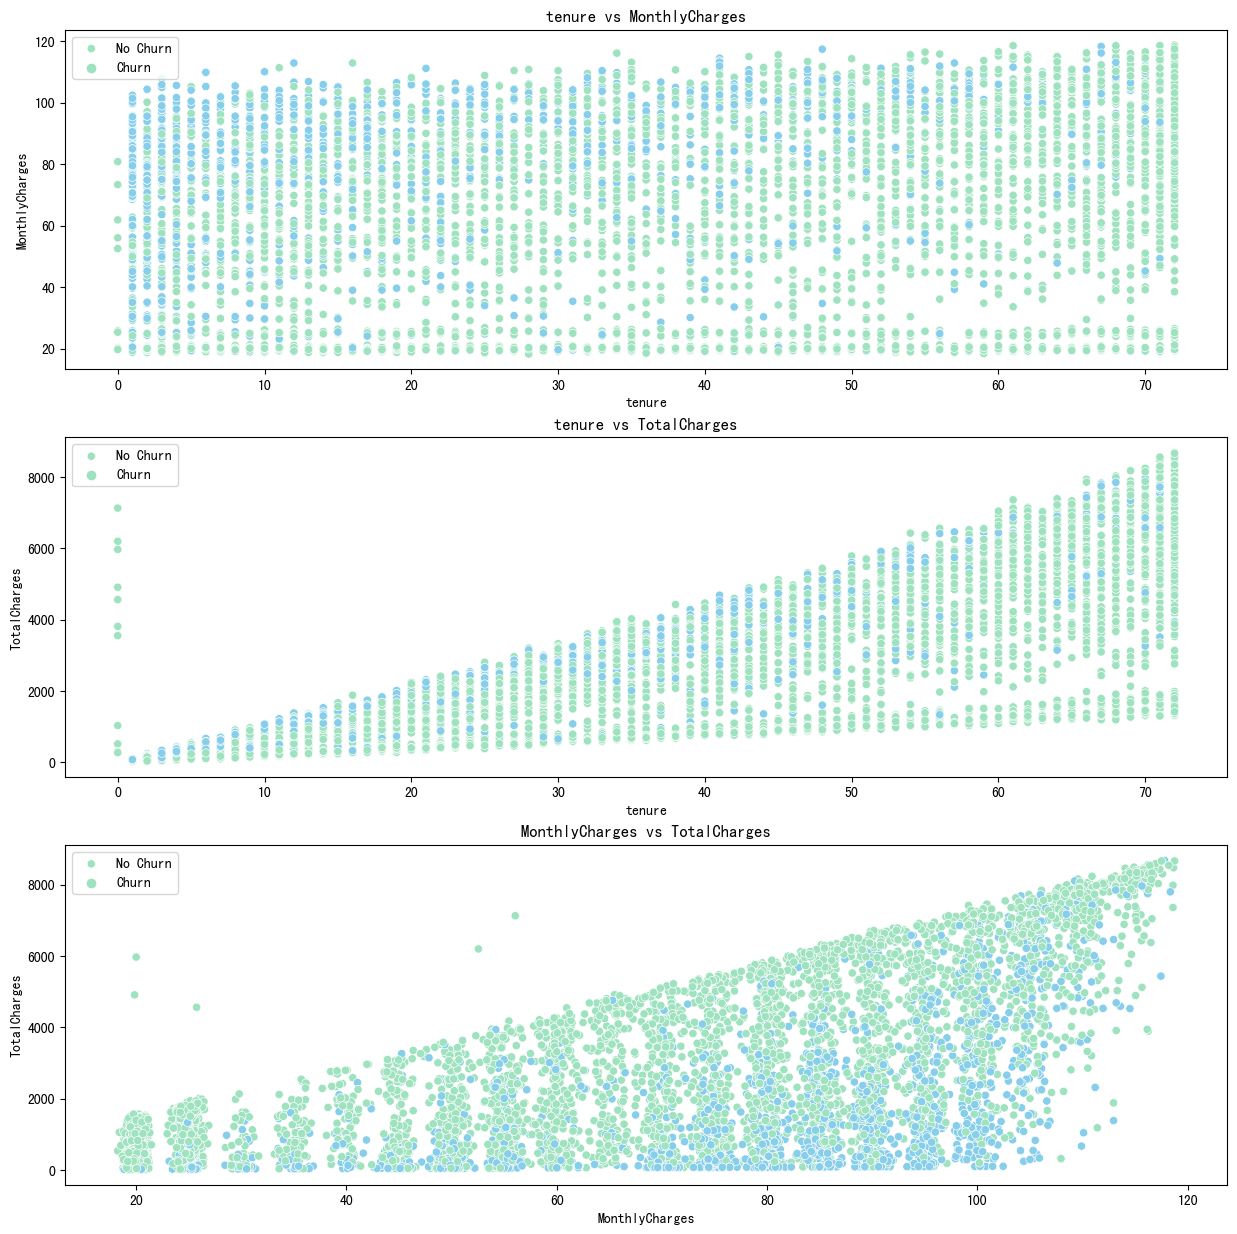

In [118]:
#查看数值特征俩俩之间关系
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'Churn',palette = colors);
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

<p>小结：</p>

<ul>
	<li>在使用时长小于20个月时，似乎不同级别的月支出对于客户流失影响不大；随着使用时长继续增加，月支出较高的这部分客户开始流失</li>
	<li>使用时长和总支出呈正相关，同样使用时长的情况下，似乎总支出越高，客户流失的可能性越大</li>
	<li>月支出和总支出也呈正相关，这是符合常理的</li>
</ul>

<p><span style="font-size:18px">总结</span></p>

通过探索性数据分析，可以得到较高流失率的客户特征，具有这些特征的客户群体需要采取针对性的运营策略，增加客户粘性，延长其生命周期价值。

<p><img alt="" src="highchurn.png" style="height:300px; width:500px" /></p>


用户维度：可针对老年人、无伴侣、无亲属的群体推出定制化服务，例如亲子套餐，加强其与社会关系的关联度，同时有可能发展更多的客户

服务维度：可针对新注册用户，在试用期间多推出新用户活动，例如前半年赠送话费代金券，以增强用户粘性，渡过用户流失高峰期。针对光纤用户（尤其是开通电视电影服务），可以重点提升服务体验，例如网速升级，媒体内容增多等。另一方面可以提供包月服务。

合同维度：针对按月合同用户，针对性地推送年包折扣活动，将月用户转换为年用户，提高用户留存。优化电子支票支付方式，或是建议用户转向其他支付。

<p><span style="font-size:20px">六、特征工程</span></p>

<p><span style="font-size:18px">（一）数据归一化</span></p>

机器学习模型不理解特征值的单位。由于大多数算法假设数据呈正态分布，因此对数据不显示正态分布的特征进行归一化，对正态分布的特征进行标准化。在此，由于tenure，MonthlyCharges，TotalCharges呈现双峰分布和右偏分布，因此对它们进行归一化。对于分类特征未进行处理。


In [122]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.01,0,1,0,0,2,0,0,0,0,0,1,2,0.12,0.00,0
1,1,0,0,0,0.47,1,0,0,2,0,2,0,0,0,1,0,3,0.39,0.22,0
2,1,0,0,0,0.03,1,0,0,2,2,0,0,0,0,0,1,3,0.35,0.01,1
3,1,0,0,0,0.62,0,1,0,2,0,2,2,0,0,1,0,0,0.24,0.21,0
4,0,0,0,0,0.03,1,0,1,0,0,0,0,0,0,0,1,2,0.52,0.02,1


<p><span style="font-size:18px">（二）协方差矩阵</span></p>

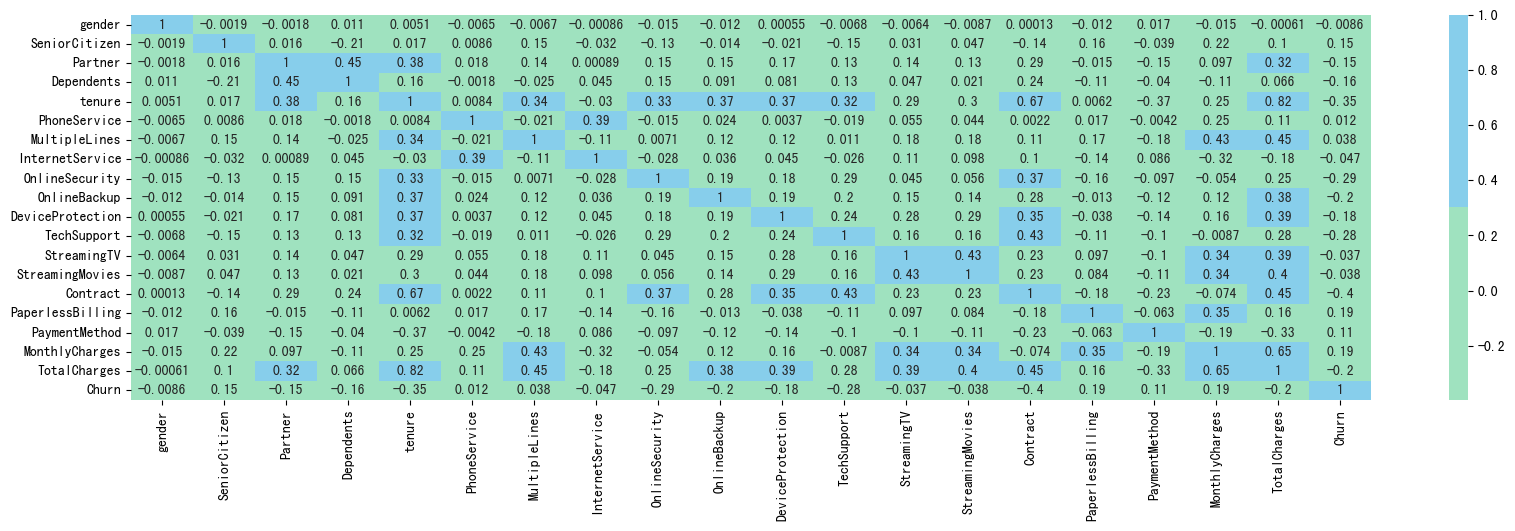

In [125]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

从协方差矩阵可以看出，gender，PhoneService，MultipleLines，InternetService，StreamingTV，StreamingMovies这几项特征与流失特征的相关系数非常小，接下来进一步验证。

<p><span style="font-size:18px">（三）分类特征选择</span></p>

通过卡方检验的方式选择分类特征。卡方检验的假设是“两个事件是相互独立的”，即当计算出的卡方值越大，则两个事件独立的概率就越小，相关性就越大。

In [126]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

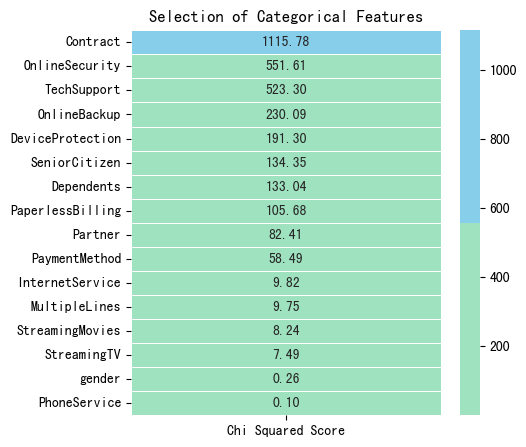

In [127]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,fmt = '.2f');
plt.title('Selection of Categorical Features');

和协方差矩阵的结果类似，后六项特征和流失特征的相关程度非常低，因此决定摈弃这些特征。

<p><span style="font-size:18px">（四）数值特征选择</span></p>

通过ANOVA检验（单因素方差分析）选择数值特征。ANOVA用于研究分类变量和连续变量之间的关系。ANOVA分数越高，特征的重要程度就越大

In [128]:
from sklearn.feature_selection import f_classif

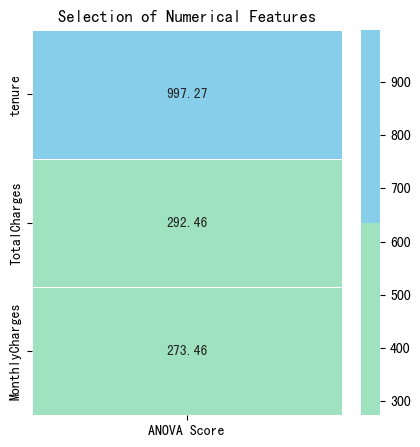

In [129]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,fmt = '.2f');
plt.title('Selection of Numerical Features');

从计算结果可以看出，三个数值特征都具有较高的ANOVA分数，因此将这些特征全部保留。

In [130]:
#删除冗余特征
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.00,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.22,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.01,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.02,1


<p><span style="font-size:18px">（四）数据平衡</span></p>

对于不平衡数据，通常采用欠采样或是过采样的方式平衡数据。欠采样即从大数目类别样本选取和小数目类别样本数目相当的样本，然后和少数目类别样本组成新的数据集，使得在新的数据集中正负样本比例相当。过采样即少数类中一个样本抽取多次，从而使正负样本数目接近，再进行学习。在这里使用SMOTE算法对数据进行过采样。

In [132]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [133]:
over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5174, 1: 5174})

<p><span style="font-size:20px">七、建模</span></p>

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [138]:
#从将样本数据按照80:20的比例划分为训练数据和测试数据
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [140]:
#训练函数
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Negative','False Positive','False Negative','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

<p><span style="font-size:18px">（一）决策树</span></p>

决策树（decision tree）是一种的分类和回归方法。学习时，利用训练数据，根据损失函数最小化的原则建立决策树模型。决策树学习包括三个步骤：特征选择、决策树的生成和决策树的剪枝。常见的决策树算法有ID3，CART等等。

In [147]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  84.80%
ROC_AUC Score :  77.02%


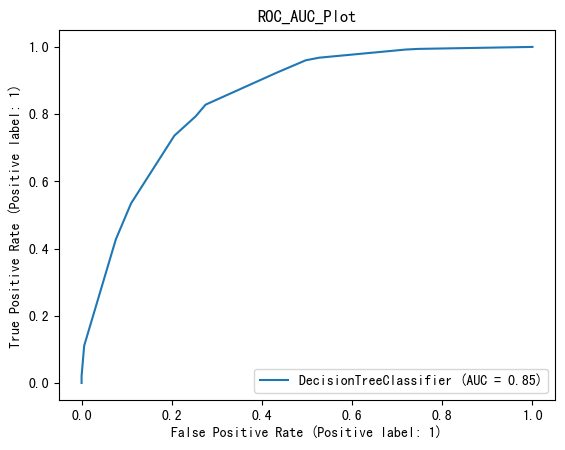

In [148]:
model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1040
           1       0.76      0.79      0.77      1030

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



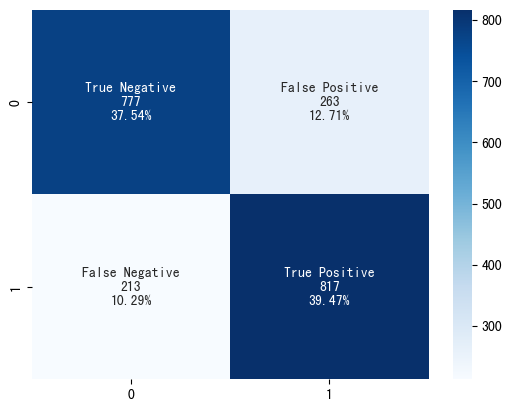

In [149]:
model_evaluation(classifier_dt,x_test,y_test)

<p><span style="font-size:18px">（二）随机森林</span></p>

随机森林是利用多棵树对样本进行训练并预测的一种分类器。随机选择特征数目，随机选择训练数据，对同一个预测数据取出现次数最多的预测标签为最终预测标签。其算法流程如下：

<ol>
	<li>用<em>N</em>来表示训练用例（样本）的个数，<em>M</em>表示特征数目。</li>
	<li>输入特征数目<em>m</em>，用于确定<a href="https://baike.baidu.com/item/%E5%86%B3%E7%AD%96%E6%A0%91" target="_blank">决策树</a>上一个节点的决策结果；其中<em>m</em>应远小于<em>M</em>。</li>
	<li>从<em>N</em>个训练用例（样本）中以有放回抽样的方式，取样<em>N</em>次，形成一个<a href="https://baike.baidu.com/item/%E8%AE%AD%E7%BB%83%E9%9B%86" target="_blank">训练集</a>（即bootstrap取样），并用未抽到的用例（样本）作预测，评估其误差。</li>
	<li>对于每一个节点，随机选择<em>m</em>个特征，决策树上每个节点的决定都是基于这些特征确定的。根据这m个特征，计算其最佳的分裂方式。</li>
	<li>每棵树都会完整成长而不会剪枝，这有可能在建完一棵正常树状分类器后会被采用）。</li>
</ol>


In [150]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  85.82%
ROC_AUC Score :  78.97%


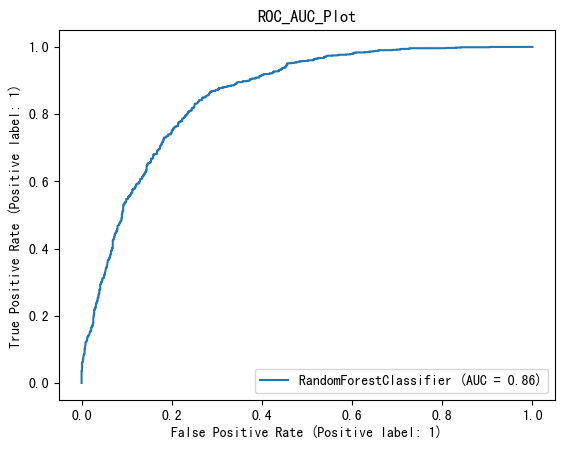

In [151]:
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1040
           1       0.75      0.87      0.80      1030

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



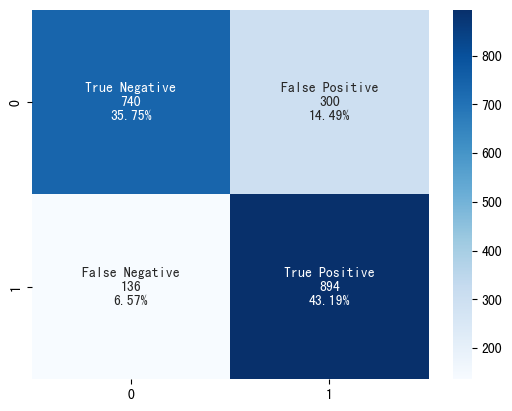

In [152]:
model_evaluation(classifier_rf,x_test,y_test)

<p><span style="font-size:18px">（三）GBDT模型</span></p>

梯度提升树(Gradient Boosting Decison Tree, GBDT)是Boosting(提升)中的一种重要算法。也就是说，本轮迭代找到决策树，要让样本的损失尽量变得更小。GBDT通过迭代不断地拟合损失。

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbdt = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,random_state=0)

Cross Validation Score :  90.44%
ROC_AUC Score :  83.01%


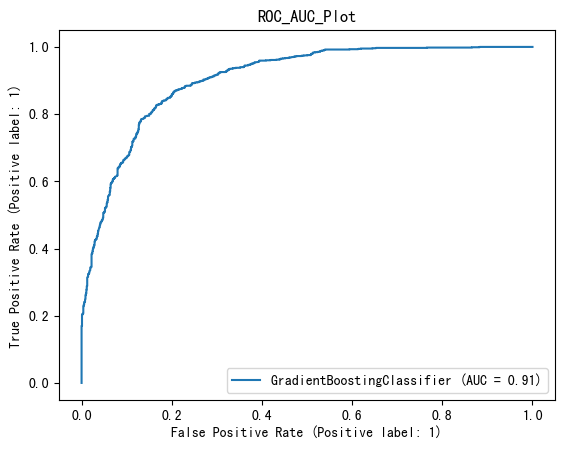

In [163]:
model(classifier_gbdt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1040
           1       0.81      0.86      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



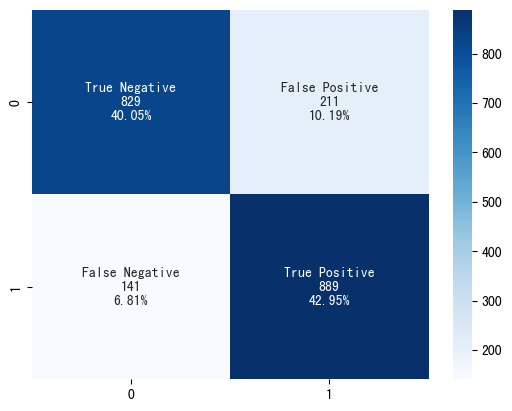

In [164]:
model_evaluation(classifier_gbdt,x_test,y_test)

<p><span style="font-size:18px">（四）Xgboost模型</span></p>

xgboost属于boosting家族，是GBDT算法的一个工程实现， 在模型的训练过程中是聚焦残差，在目标函数中使用了二阶泰勒展开并加入了正则，在决策树的生成过程中采用了精确贪心的思路，寻找最佳分裂点的时候，使用了预排序算法， 对所有特征都按照特征的数值进行预排序， 然后遍历所有特征上的所有分裂点位，计算按照这些候选分裂点位分裂后的全部样本的目标函数增益，找到最大的那个增益对应的特征和候选分裂点位，从而进行分裂。这样一层一层的完成建树过程， xgboost训练的时候，是通过加法的方式进行训练，也就是每一次通过聚焦残差训练一棵树出来， 最后的预测结果是所有树的加和表示。

In [143]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.47%
ROC_AUC Score :  83.15%


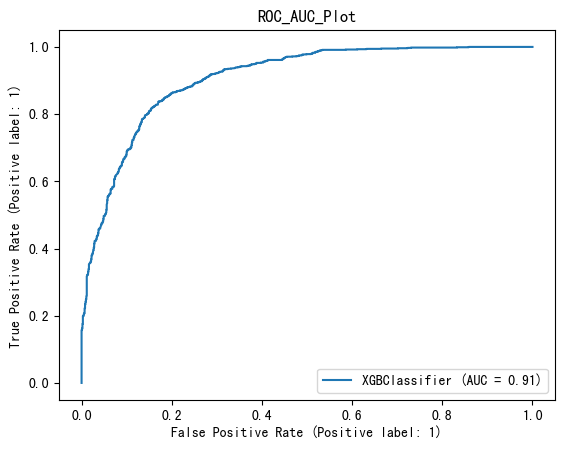

In [144]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1040
           1       0.81      0.86      0.84      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



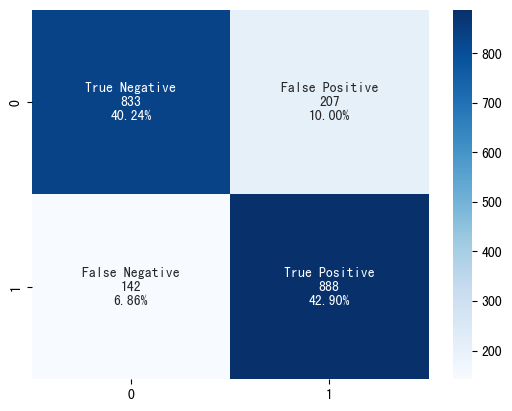

In [153]:
model_evaluation(classifier_xgb,x_test,y_test)

<p><span style="font-size:18px">（五）模型Stacking融合</span></p>

Stacking 是一种集合学习技术，通过元分类器组合多个分类模型。基于完整训练集训练各个分类模型; 然后，基于整体中的各个分类模型的输出 - 元特征来拟合元分类器。元分类器可以根据预测类标签或来自集合的概率进行训练。在此将三个模型进行融合。

In [165]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_gbdt',classifier_gbdt),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_xgb)


Cross Validation Score :  91.20%
ROC_AUC Score :  83.77%


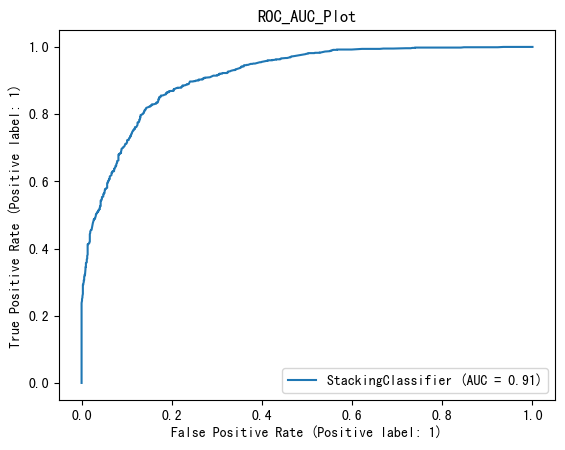

In [166]:
model(stack,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1040
           1       0.83      0.85      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



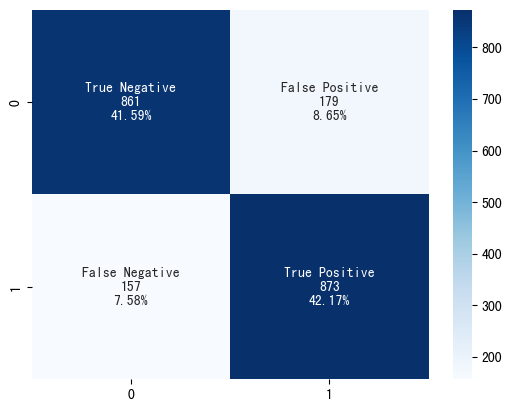

In [167]:
model_evaluation(stack,x_test,y_test)

<table border="1" cellpadding="1" cellspacing="1" style="width:500px">
	<tbody>
		<tr>
			<td style="text-align:center"><strong>模型</strong></td>
			<td style="text-align:center"><strong>CV score</strong></td>
			<td style="text-align:center"><strong>ROC AUC score</strong></td>
			<td style="text-align:center"><strong>F1 score</strong></td>
		</tr>
		<tr>
			<td style="text-align:center">决策树</td>
			<td style="text-align:center">84.80%</td>
			<td style="text-align:center">77.02%</td>
			<td style="text-align:center">0.77</td>
		</tr>
		<tr>
			<td style="text-align:center">随机森林</td>
			<td style="text-align:center">85.82%</td>
			<td style="text-align:center">78.97%</td>
			<td style="text-align:center">0.79</td>
		</tr>
		<tr>
			<td style="text-align:center">GBDT模型</td>
			<td style="text-align:center">90.44%</td>
			<td style="text-align:center">83.01%</td>
			<td style="text-align:center">0.83</td>
		</tr>
		<tr>
			<td style="text-align:center">Xgboost模型</td>
			<td style="text-align:center">90.47%</td>
			<td style="text-align:center">83.15%</td>
			<td style="text-align:center">0.83</td>
		</tr>
		<tr>
			<td style="text-align:center">Stacking融合模型</td>
			<td style="text-align:center">91.20%</td>
			<td style="text-align:center">83.77%</td>
			<td style="text-align:center">0.84</td>
		</tr>
	</tbody>
</table>

<p>&nbsp;</p>

从模型效果对比可以看出，模型的预测准确度逐步提升，Stacking融合模型具有最好的各项分数，可以考虑在实际业务中运用。

<p><span style="font-size:20px">八、结论与建议</span></p>

本文首先对电信客户流失数据进行清洗，然后分别从分类特征和数值特征的角度进行探索性分析，得到流失用户的基本画像，为客服部门针对性运营提供参考意见。

同时洞察数据中的深层次信息，并基于这些印象，选择典型特征，构建机器学习模型，对流失用户进行预测。本文用了决策树、随机森林、GBDT模型、Xgboost模型以及这四个模型的Stacking融合模型分别进行预测，预测准确程度依次提升。客服部门可以基于预测模型，构建高流失用户列表，并深入优化服务（例如针对这一部分人群进行访谈）。